In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

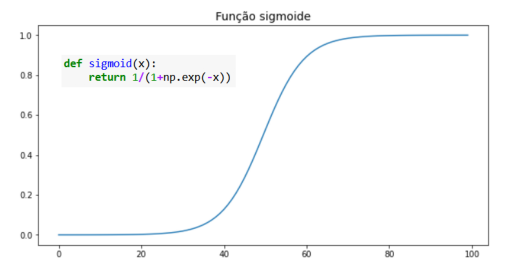

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as img

imagem = img.imread('regressao_logica.png')
plt.imshow(imagem)
plt.axis('off') 
plt.show()

            CANDIDATO  SITUACAO  DESPESAS
0       George Turner         0        10
1      Victor Johnson         0       100
2         Jerry Perry         1      1600
3        Shirley Cook         1      1500
4      Carolyn Bailey         1      3300
5       Susan Sanders         0       200
6      Anthony Harris         1      1800
7   Philip Richardson         1      1700
8     Eugene Phillips         0       300
9      Mildred Morris         1      1800
10      Richard Jones         0       100
11     Joan Hernandez         0       500
12  Lawrence Mitchell         1      3000
13       Annie Brooks         0        20
14    Stephen Simmons         0       200
15     Samuel Russell         1       700
16        Jason Brown         1      1600
17     Bobby Gonzalez         1      1900
18     Steven Coleman         0       100
19   Benjamin Ramirez         0       400
20      Pamela Bryant         1      2700
21        Billy Perez         0       200
22       Julia Watson         0   

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


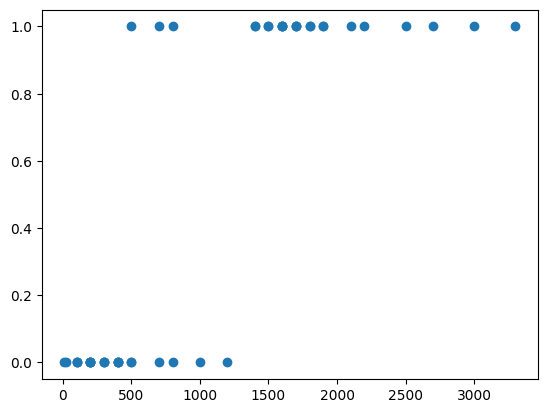

In [38]:
base = pd.read_csv('Eleicao.csv', sep = ';')
print(base)
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [39]:
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [40]:
# Criação das variávies X e y (variável independente e variável dependente)
# Transformação de X para o formato de matriz adicionando um novo eixo (newaxis)
X = base.iloc[:, 2].values
X = X[:, np.newaxis]

Y = base.iloc[:, 1].values

In [41]:
# Criação do modelo, treinamento e visualização dos coeficientes
modelo = LogisticRegression()
modelo.fit(X, Y)

LogisticRegression()

In [42]:
modelo.coef_

array([[0.00498364]])

In [43]:
modelo.intercept_

array([-4.60287217])

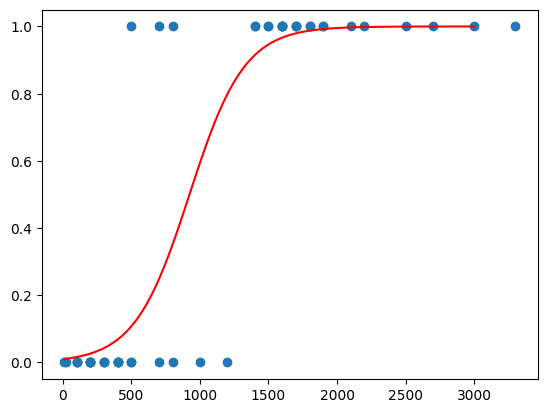

In [44]:
plt.scatter(X, Y)

# Geração de novos dados para gerar a função sigmoide
X_teste = np.linspace(10, 3000, 100)

# Implementação da função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))

# Geração de previsões (variável r) e visualização dos resultados
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')

In [45]:
# Carregamento da base de dados com os novos candidatos
base_previsoes = pd.read_csv('NovosCandidatos.csv', sep = ';')

# Mudança dos dados para formato de matriz
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

# Previsões e geração de nova base de dados com os valores originais e as previsões
previsoes_teste = modelo.predict(despesas)
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))